# Statistiques descriptives bi-variées
Description
## Préparation des données

In [43]:
import pandas as pd
from _jointure_validations_stations import df_jointure_validations_stations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=df_jointure_validations_stations()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


On rappelle que les données socio-démographiques correspondent aux données Insee du carreau de 1 km dans lequel se situe la station de *RER*.

On donne ici quelques informations sur le nom des colonnes des données Insee :
* *ind* : nombre d'individus ;
* *men* : nombre de ménages ;
* *men_pauv* : nombre de ménages pauvres ;
* *men_**i**ind* : nombre de ménages avec ***i*** invidus ;
* men_prop* : nombre de ménages propriétaires ;
* *men_fmp* : nombre de ménages monoparentaux ;
* *ind_snv* : somme des niveaux de vie winsorisés des individus ;
* *men_coll* : nombre de ménages en logements collectifs ;
* *log_**A1**_**A2*** : nombre de logements construits entre ***A1*** et ***A2*** ;
* *ind_**A1**_**A2*** : nombre d'individus de ***A1*** à ***A2*** ans.

On commence par aggréger les données pour chaque gare : on fait la somme des validations et on gare les valeurs de l'Insee telle quelle.

In [5]:
data.columns

Index(['JOUR', 'lda', 'CATEGORIE_TITRE', 'NB_VALD', 'Mois', 'Année',
       'Geo Point', 'Geo Shape', 'gares_id', 'nom_long', 'nom_so_gar',
       'nom_su_gar', 'id_ref_ZdC', 'nom_ZdC', 'id_ref_ZdA', 'nom_ZdA',
       'idrefliga', 'idrefligc', 'indice_lig', 'mode_', 'tertrain', 'terrer',
       'termetro', 'tertram', 'terval', 'exploitant', 'idf', 'principal', 'x',
       'y', 'picto ligne', 'nom_iv', 'geometry', 'index_right', 'idcar_1km',
       'i_est_1km', 'lcog_geo', 'ind', 'men', 'men_pauv', 'men_1ind',
       'men_5ind', 'men_prop', 'men_fmp', 'ind_snv', 'men_surf', 'men_coll',
       'men_mais', 'log_av45', 'log_45_70', 'log_70_90', 'log_ap90', 'log_inc',
       'log_soc', 'ind_0_3', 'ind_4_5', 'ind_6_10', 'ind_11_17', 'ind_18_24',
       'ind_25_39', 'ind_40_54', 'ind_55_64', 'ind_65_79', 'ind_80p',
       'ind_inc', 'pre_IDF', 'select', 'expt', '', 'res_com'],
      dtype='object')

In [71]:
aggregation_functions = {'NB_VALD': 'sum'}

# Liste avec les colonnes de l'INSEE
Insee_columns = [
    'ind', 'men', 'men_pauv', 'men_1ind', 'men_5ind', 'men_prop', 'men_fmp', 
    'ind_snv', 'men_surf', 'men_coll', 'men_mais', 'log_av45', 'log_45_70', 
    'log_70_90', 'log_ap90', 'log_inc', 'log_soc', 'ind_0_3', 'ind_4_5', 
    'ind_6_10', 'ind_11_17', 'ind_18_24', 'ind_25_39', 'ind_40_54', 
    'ind_55_64', 'ind_65_79', 'ind_80p', 'lda', 'res_com'
]

for column in Insee_columns:
    aggregation_functions[column] = 'first'

data_stations = data.groupby('nom_long').agg(aggregation_functions)

On vérifie que l'opération s'est faite correctement.

In [73]:
data_stations.tail()

,NB_VALD,ind,men,men_pauv,men_1ind,men_5ind,men_prop,men_fmp,ind_snv,men_surf,...,ind_6_10,ind_11_17,ind_18_24,ind_25_39,ind_40_54,ind_55_64,ind_65_79,ind_80p,lda,res_com
nom_long,,,,,,,,,,,,,,,,,,,,,
Épinay-sur-Seine,769663,8149.5,2836.0,783.0,806.0,496.0,1025.0,439.0,144046678.2,191917.0,...,742.5,931.5,506.0,1589.0,1693.0,902.0,743.0,185.0,72383,RER C
Étampes,453145,3731.0,1768.9,245.9,763.0,125.0,810.0,249.0,83271876.4,121905.0,...,181.5,325.5,348.0,813.0,723.0,447.1,424.0,173.0,59577,RER C
Étréchy,95076,1088.5,464.9,17.0,146.0,29.0,369.1,32.9,29621627.7,39853.0,...,55.0,99.4,76.1,186.9,207.0,146.1,157.0,96.0,59678,RER C
Évry,78664,2159.5,1012.0,112.0,423.0,74.0,498.1,150.0,55589989.3,79412.1,...,128.1,190.0,160.5,389.9,420.1,267.0,315.9,132.0,60522,RER D
Évry Courcouronnes,1855661,9599.0,3805.0,958.0,1485.0,522.0,1036.0,574.0,176360290.5,220683.0,...,812.5,922.5,711.5,2661.0,1681.0,817.0,593.0,114.0,60450,RER D


In [74]:
data[data['nom_long']=='Évry Courcouronnes'].head(1)

,JOUR,lda,CATEGORIE_TITRE,NB_VALD,Mois,Année,Geo Point,Geo Shape,gares_id,nom_long,...,ind_40_54,ind_55_64,ind_65_79,ind_80p,ind_inc,pre_IDF,select,expt,,res_com
86011,2023-01-01,60450,NON DEFINI,93,1,2023,"48.62590139398081, 2.430155386011356","{""coordinates"": [2.430155386011356, 48.6259013...",277,Évry Courcouronnes,...,1681.0,817.0,593.0,114.0,38.0,1.0,1.0,1.0,NaN,RER D


Les valeurs correspondent bien.

Nous créons des catégories en fonction du nombre de validation pour avoir des représentations graphiques plus lisibles. On prend simplement les cartiles pour faire 4 catégories.

In [75]:
data_stations['NB_VALD'].describe()

count    2.340000e+02
mean     1.406144e+06
std      2.717862e+06
min      2.909000e+03
25%      2.395815e+05
50%      7.163345e+05
75%      1.672016e+06
max      2.711709e+07
Name: NB_VALD, dtype: float64

In [76]:
def categorize_nb_vald(nb_vald):
    if nb_vald < 2.395815e+05:
        return 'très peu de validations'
    elif nb_vald < 7.163345e+05:
        return 'peu de validations'
    elif nb_vald < 1.672016e+06:
        return 'grand nombre de validations'
    else:
        return 'très grand nombre de validations'

#On applique la fonction
data_stations['validations'] = data_stations['NB_VALD'].apply(categorize_nb_vald)

## Analyse avec les caractéristiques des ménages

<Axes: >

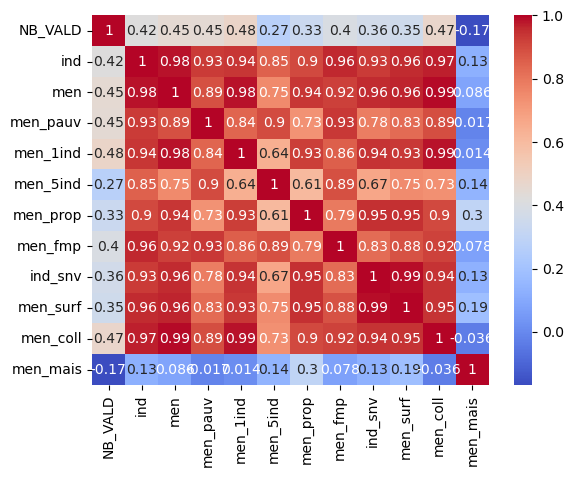

In [77]:
df_num = data_stations.select_dtypes(include=['int', 'float'])
df_num = df_num.iloc[:, 0:12]
matrice_correlation = df_num.corr()
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm')

Le nombre de validations est relativement peu corrélé aux variables des données Insee sur les caractéristiques des ménages. Les corrélations les plus fortes sont avec le nombre de ménages avec un seul individu, le nombre de ménages en logements collectifs ainsi que les nombre de ménages et de ménages pauvres.

Remarquons que le nombre de validations est positivement corrélés à toutes les variables de cette section, à l'exception du nombre de ménages en maison : cela pourrait correspondre à des zones peu déservies par les *RER*.

Enfin, nous pouvons également noter que les variables de l'Insee sont très fortement corrélées entre elles.

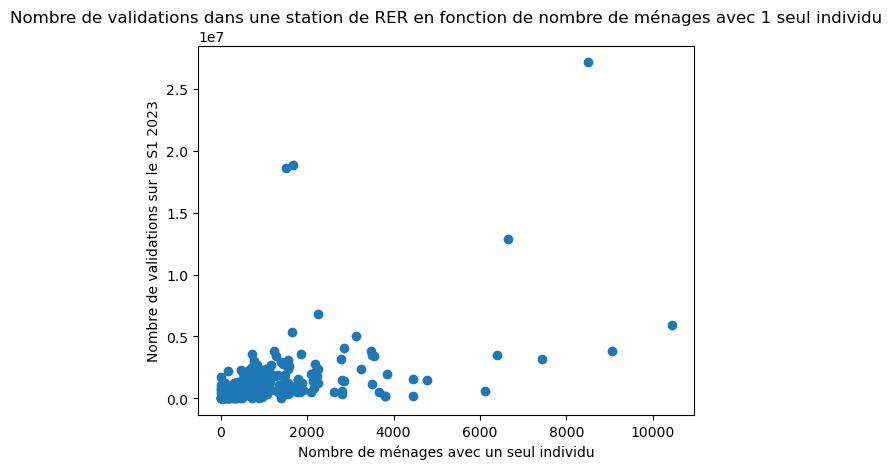

In [78]:
plt.scatter(data_stations['men_1ind'],data_stations['NB_VALD'])
plt.title('Nombre de validations dans une station de RER en fonction de nombre de ménages avec 1 seul individu')
plt.ylabel('Nombre de validations sur le S1 2023')
plt.xlabel('Nombre de ménages avec un seul individu')
plt.show()

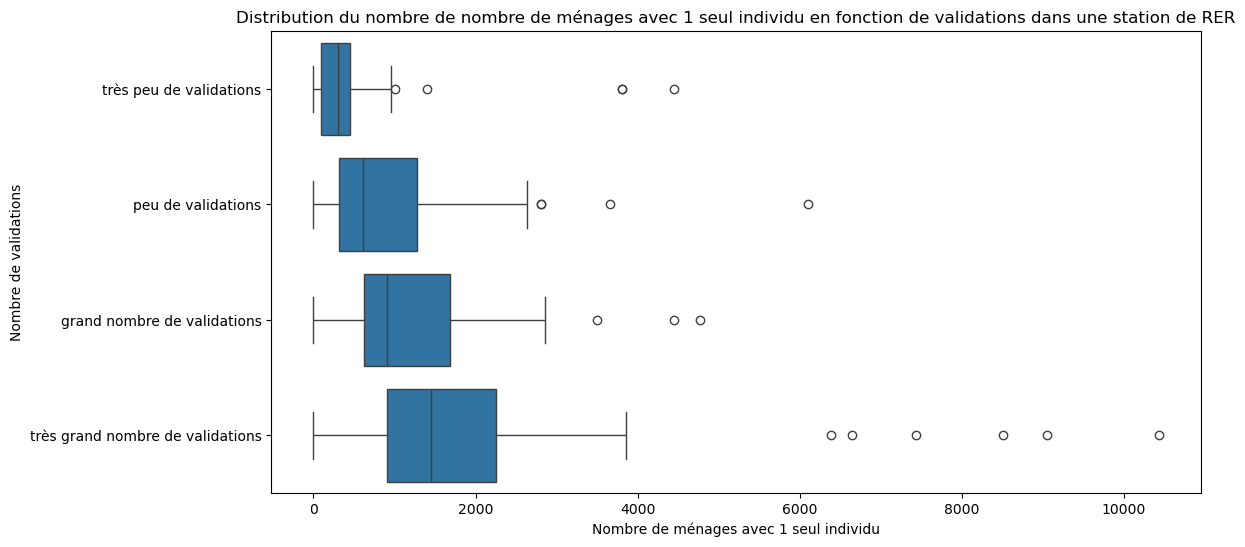

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='men_1ind', y='validations', data=data_stations,
         order=["très peu de validations", "peu de validations", "grand nombre de validations",
                "très grand nombre de validations"])
plt.title('Distribution du nombre de nombre de ménages avec 1 seul individu en fonction de validations dans une station de RER')
plt.xlabel('Nombre de ménages avec 1 seul individu')
plt.ylabel('Nombre de validations')
plt.show()

Plus le nombre de validations est important plus le nombre de ménages avec un seul individu augmente. Cela peut-être interprété de deux manières :
* Soit les ménages avec un seul individu prennent plus les transports en commun ;
* Soit les zones avec de validations ont plus de ménages, dont plus de ménages avec un seul individu.

On se propose maintenant de diviser le nombre de ménages avec un seul individu par le nombre de ménage pour voir si l'une des deux explications est plus plausible.

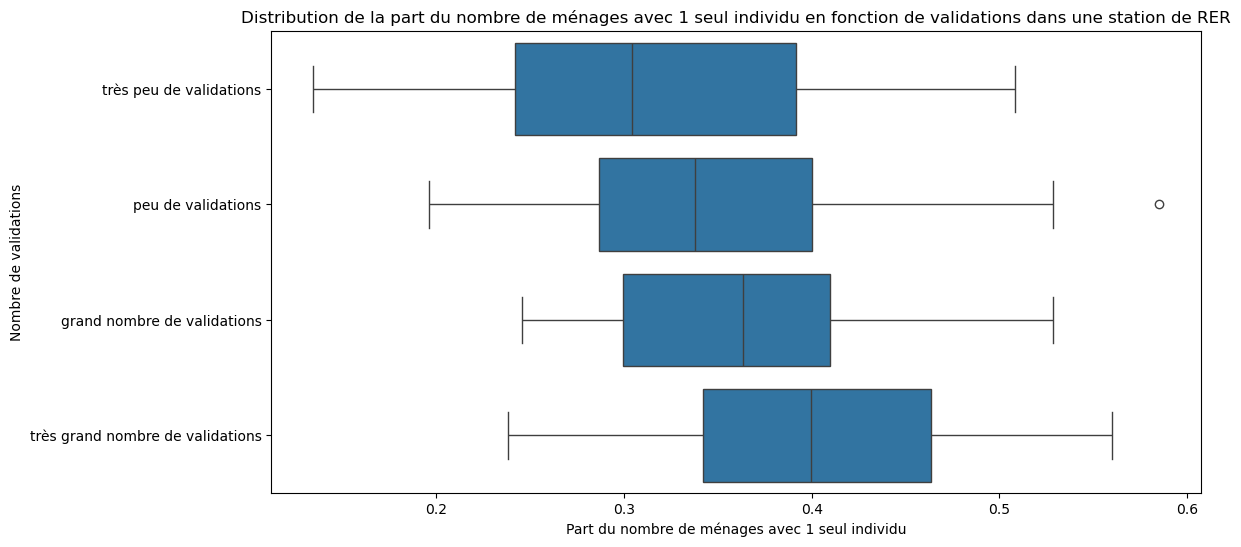

In [80]:
data_stations['part_men_1ind']=data_stations['men_1ind']/data_stations['men']
plt.figure(figsize=(12, 6))
sns.boxplot(x='part_men_1ind', y='validations', data=data_stations,
         order=["très peu de validations", "peu de validations", "grand nombre de validations",
                "très grand nombre de validations"])
plt.title('Distribution de la part du nombre de ménages avec 1 seul individu en fonction de validations dans une station de RER')
plt.xlabel('Part du nombre de ménages avec 1 seul individu')
plt.ylabel('Nombre de validations')
plt.show()

En "controllant" par le nombre de ménages dans chaque carreau des stations de *RER* on retrouve le même constant que tout à l'heure : cela signifie donc qu'il y a plus de ménages avec un seul individu (en proportion) dans les zones avec beaucoup de validations. Si l'on prend ce constant dans l'autre sens il semble logique : les familles ont peut-être plus de difficultés à prendre le *RER* (poussettes et enfants).

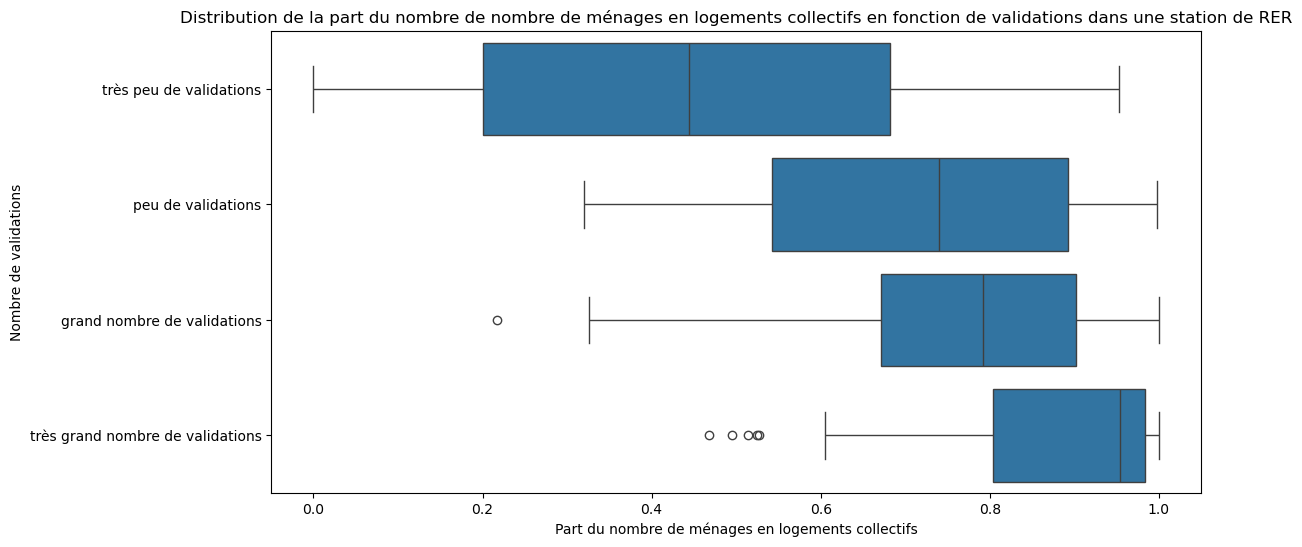

In [81]:
data_stations['part_men_coll']=data_stations['men_coll']/data_stations['men']
plt.figure(figsize=(12, 6))
sns.boxplot(x='part_men_coll', y='validations', data=data_stations,
         order=["très peu de validations", "peu de validations", "grand nombre de validations",
                "très grand nombre de validations"])
plt.title('Distribution de la part du nombre de nombre de ménages en logements collectifs en fonction de validations dans une station de RER')
plt.xlabel('Part du nombre de ménages en logements collectifs')
plt.ylabel('Nombre de validations')
plt.show()

Etant donnée que le nombre de ménages avec un seul individu et le nombre de ménages en logements collectifs étaient extrèmement corrélés (presque 1), on trouve des résultats similaires sur ce graphique : le nombre de ménages en logements collectifs augmente avec le nombre de validations. On peut noter que cette tendance est beaucoup plus forte que pour les ménages avec un seul individu. Deux explications (complémentaires) peuvent être avancées :
* Les logements collectifs sont situés dans des zones très denses où l'utilisation de la voiture est compliquée ;
* Dans certains logegements collectifs, les ménages n'ont pas assez de moyens pour posséder une voiture.

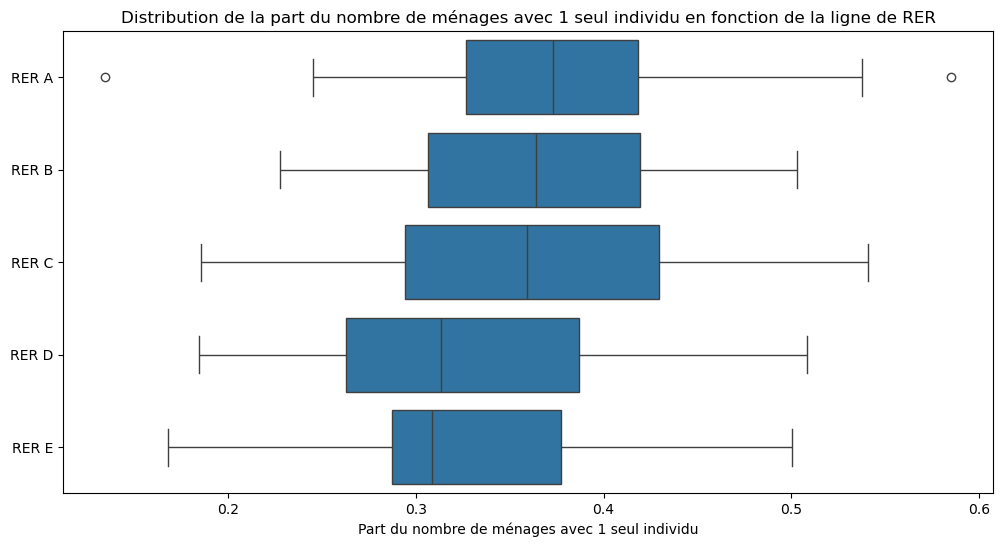

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='part_men_1ind', y='res_com', data=data_stations,
           order = ['RER A', 'RER B', 'RER C', 'RER D', 'RER E'])
plt.title('Distribution de la part du nombre de ménages avec 1 seul individu en fonction de la ligne de RER')
plt.xlabel('Part du nombre de ménages avec 1 seul individu')
plt.ylabel('')
plt.show()

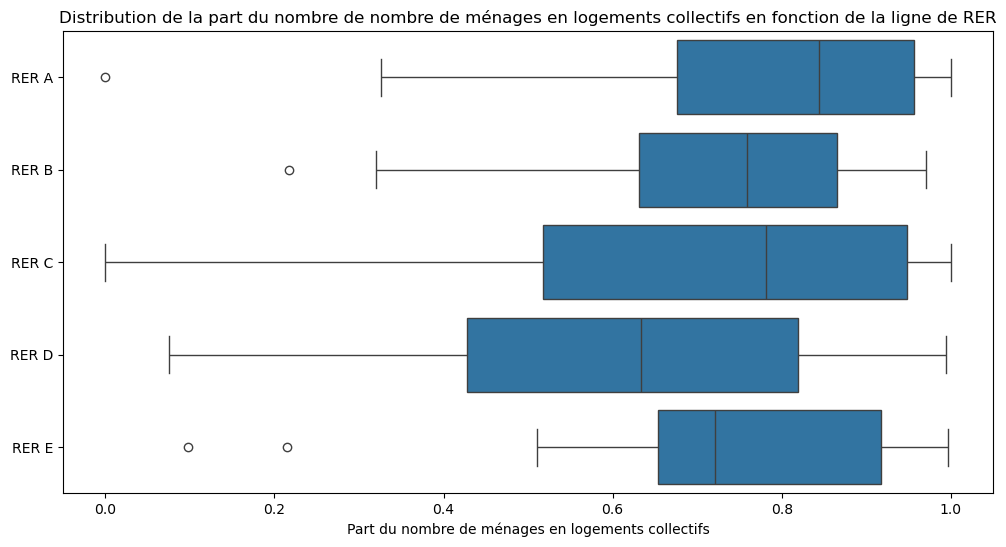

In [88]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='part_men_coll', y='res_com', data=data_stations,
           order = ['RER A', 'RER B', 'RER C', 'RER D', 'RER E'])
plt.title('Distribution de la part du nombre de nombre de ménages en logements collectifs en fonction de la ligne de RER')
plt.xlabel('Part du nombre de ménages en logements collectifs')
plt.ylabel('')
plt.show()

*remarque : les stations en correspondances sont retirées de l'analyse*

Les deux graphiques ci-dessus montre que chaque ligne de *RER* à des spécificités socio-démographiques différentes (on ne peut pas le voir ici mais ces spécificités sont également très grandes au *sein* de chaque ligne).

Le *RER D* est le plus étendu : il semble donc logique qu'il desserve des zones moins denses. A l'inverse, le *RER A* est le plus fréquentés : il dessert donc des zones avec plus de logements collectifs.

## Analyse avec les caractéristiques des logements

<Axes: >

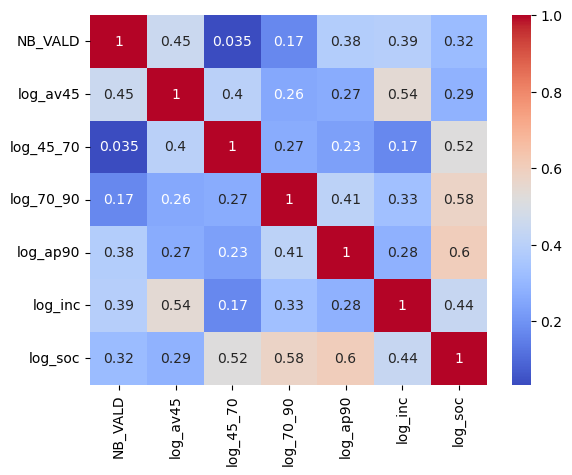

In [38]:
df_num = data_stations.select_dtypes(include=['int', 'float'])
df_num = df_num.iloc[:, [0]+ list(range(12,18))]
matrice_correlation = df_num.corr()
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm')

Les corrélations entre les caractéristiques des logements et le nombre de validations dans les stations de *RER* est relativement faible (bien que positif tout le temps). Les variables de l'Insee sont très peu corrélés, ce qui montre que les quartiers  des *RER* étaient déjà existants ou ont été construits pour l'occasion.

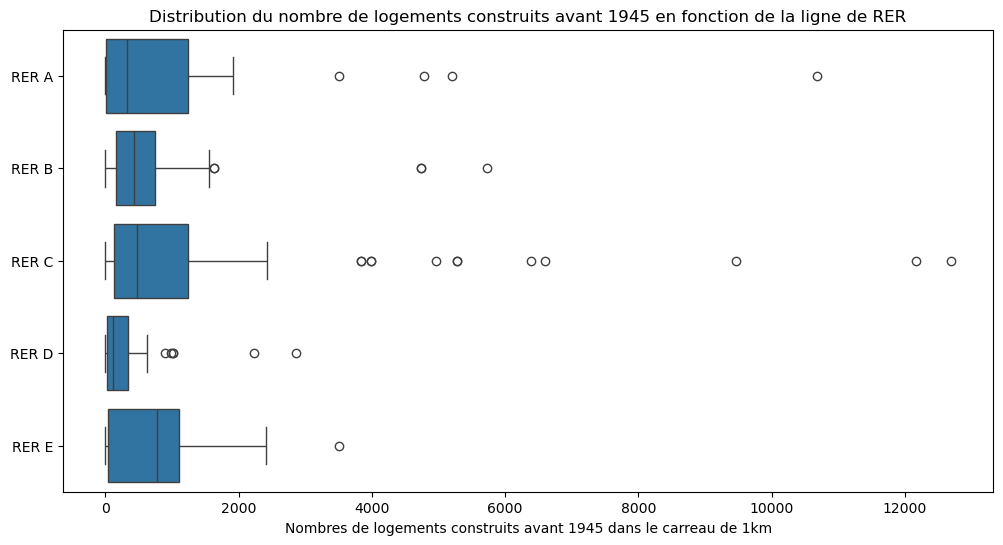

In [91]:
data_stations['part_log_av45']=data_stations['log_av45']/(data_stations['log_av45']+data_stations['log_45_70']+data_stations['log_70_90']+data_stations['log_ap90'])
plt.figure(figsize=(12, 6))
sns.boxplot(x='log_av45', y='res_com', data=data_stations,
           order = ['RER A', 'RER B', 'RER C', 'RER D', 'RER E'])
plt.title('Distribution du nombre de logements construits avant 1945 en fonction de la ligne de RER')
plt.xlabel('Nombres de logements construits avant 1945 dans le carreau de 1km')
plt.ylabel('')
plt.show()

Le *RER E* est le dernier né du réseau, et pourtant il est celui qui dessert, en moyenne, les quartiers avec le plus de logements construits avant 1945. Cela montre que la création de ce *RER E* a (en partie) pour but de mieux relier les banlieux est qui sont très peuplées.

C'est sur le *RER C* qu'il y a la plus grande variabilité : cela témoigne de la déserte de quartiers très historiques, mais aussi de nouveaux quartiers. 

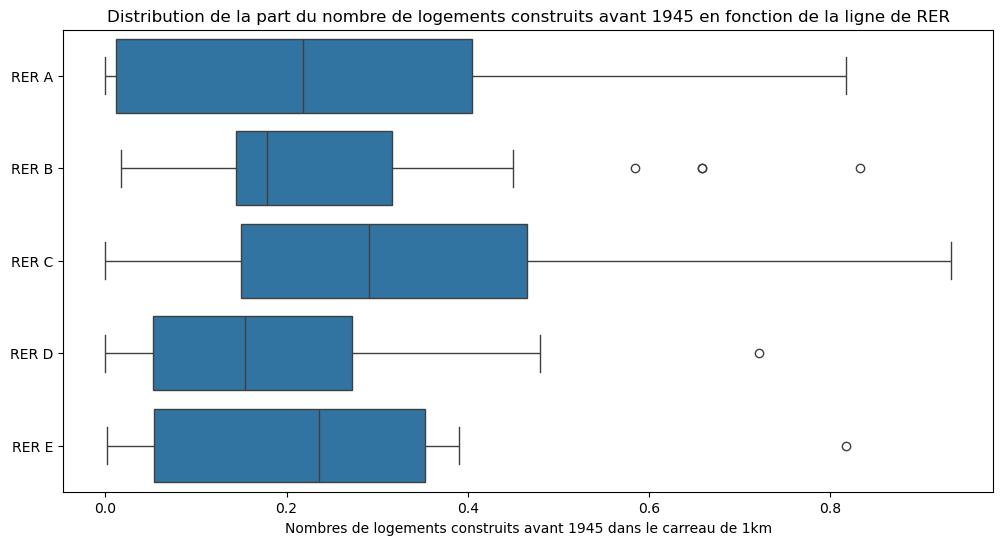

In [94]:
data_stations['part_log_av45']=data_stations['log_av45']/(data_stations['log_av45']+data_stations['log_45_70']+data_stations['log_70_90']+data_stations['log_ap90'])
plt.figure(figsize=(12, 6))
sns.boxplot(x='part_log_av45', y='res_com', data=data_stations,
           order = ['RER A', 'RER B', 'RER C', 'RER D', 'RER E'])
plt.title('Distribution de la part du nombre de logements construits avant 1945 en fonction de la ligne de RER')
plt.xlabel('Nombres de logements construits avant 1945 dans le carreau de 1km')
plt.ylabel('')
plt.show()

Si l'on normalise avec le nombre de ménages total le constat est très similaire.

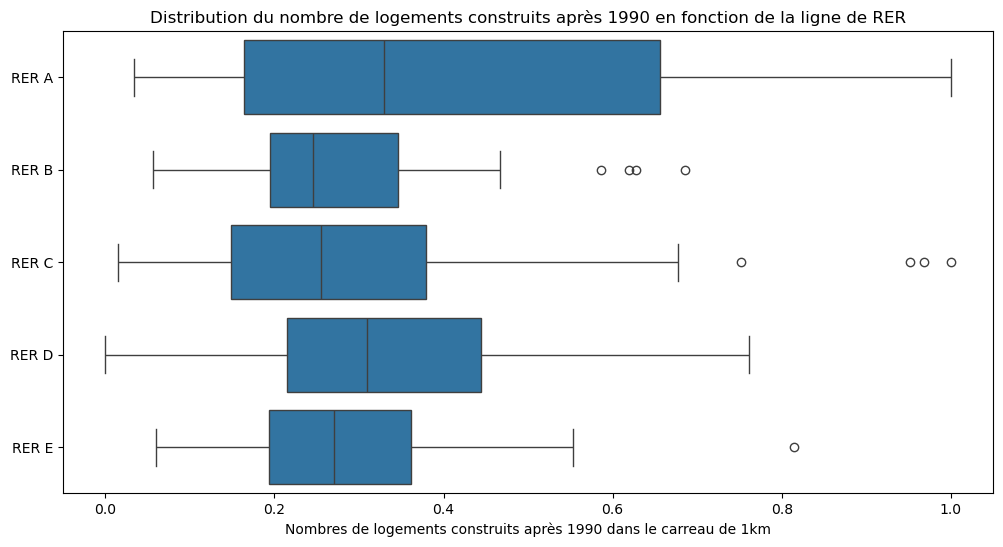

In [95]:
data_stations['part_log_ap90']=data_stations['log_ap90']/(data_stations['log_av45']+data_stations['log_45_70']+data_stations['log_70_90']+data_stations['log_ap90'])
plt.figure(figsize=(12, 6))
sns.boxplot(x='part_log_ap90', y='res_com', data=data_stations,
           order = ['RER A', 'RER B', 'RER C', 'RER D', 'RER E'])
plt.title('Distribution du nombre de logements construits après 1990 en fonction de la ligne de RER')
plt.xlabel('Nombres de logements construits après 1990 dans le carreau de 1km')
plt.ylabel('')
plt.show()

C'est le *RER A* qui a, en moyenne 40% de logements construits après 1990 dans le quartier de ses gares, qui a la proportion la plus élevée. C'est sur ce même *RER* qu'il y a le plus de variabilité : cela témoigne de la construction de nouveaux quartiers, et même parfois de nouvelles villes (comme *Cergy*), tandis que d'autres gares déservent des quartiers avec des logements plus anciens (soit historiques, soit construit un peu avant l'arrivée du *RER*).

## Analyse avec les caractéristiques des individus

<Axes: >

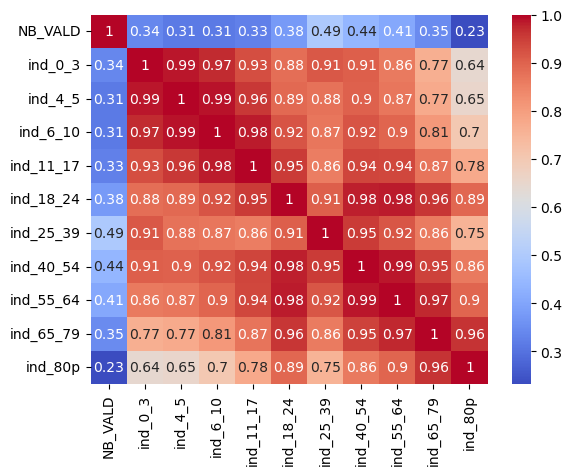

In [40]:
df_num = data_stations.select_dtypes(include=['int', 'float'])
df_num = df_num.iloc[:, [0]+ list(range(18,28))]
matrice_correlation = df_num.corr()
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm')

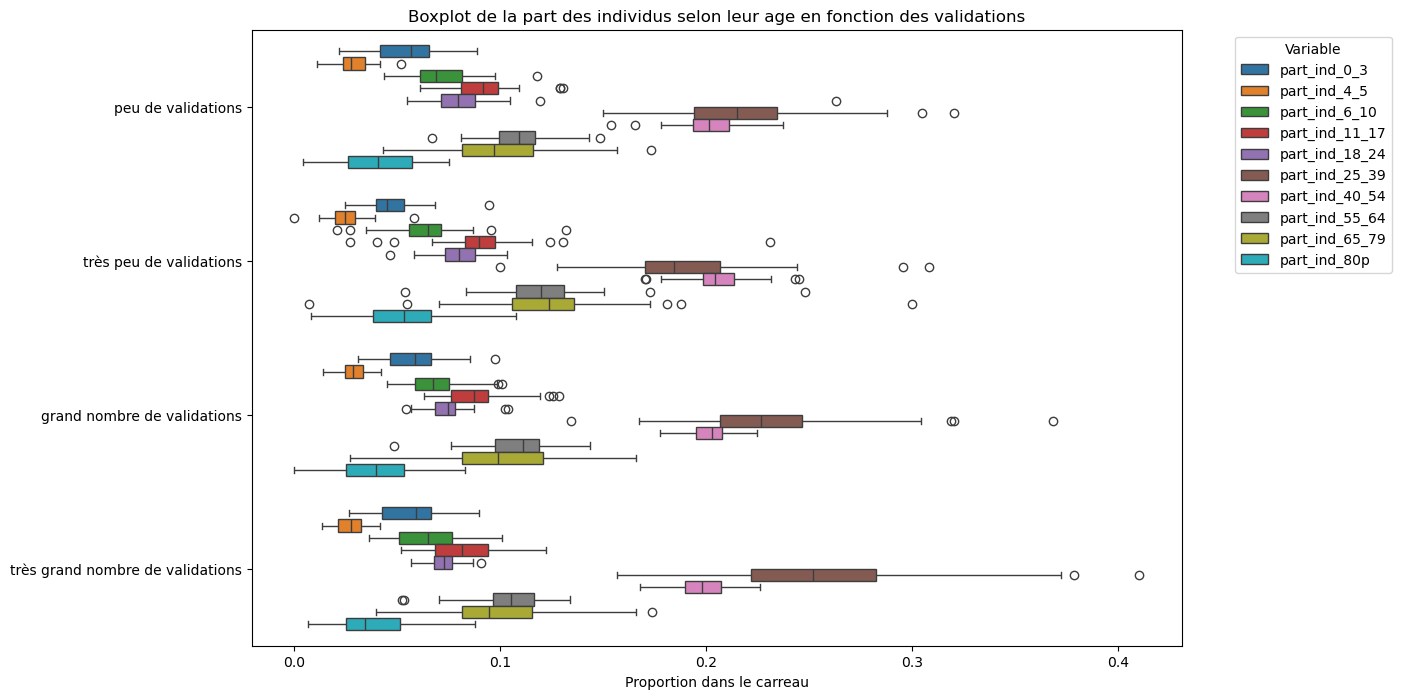

In [114]:
data_stations['part_ind_0_3']=data_stations['ind_0_3']/data_stations['ind']
data_stations['part_ind_4_5']=data_stations['ind_4_5']/data_stations['ind']
data_stations['part_ind_6_10']=data_stations['ind_6_10']/data_stations['ind']
data_stations['part_ind_11_17']=data_stations['ind_11_17']/data_stations['ind']
data_stations['part_ind_18_24']=data_stations['ind_18_24']/data_stations['ind']
data_stations['part_ind_25_39']=data_stations['ind_25_39']/data_stations['ind']
data_stations['part_ind_40_54']=data_stations['ind_40_54']/data_stations['ind']
data_stations['part_ind_55_64']=data_stations['ind_55_64']/data_stations['ind']
data_stations['part_ind_65_79']=data_stations['ind_65_79']/data_stations['ind']
data_stations['part_ind_80p']=data_stations['ind_80p']/data_stations['ind']
data_melted = pd.melt(data_stations, id_vars=['validations'], value_vars=data_stations.columns[35:45], var_name='Variable', value_name='Value')
plt.figure(figsize=(12, 8))
sns.boxplot(x='Value', y='validations', hue='Variable', data=data_melted, orient='h')
plt.title('Boxplot de la part des individus selon leur age en fonction des validations')
plt.xlabel('Proportion dans le carreau')
plt.ylabel('')
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

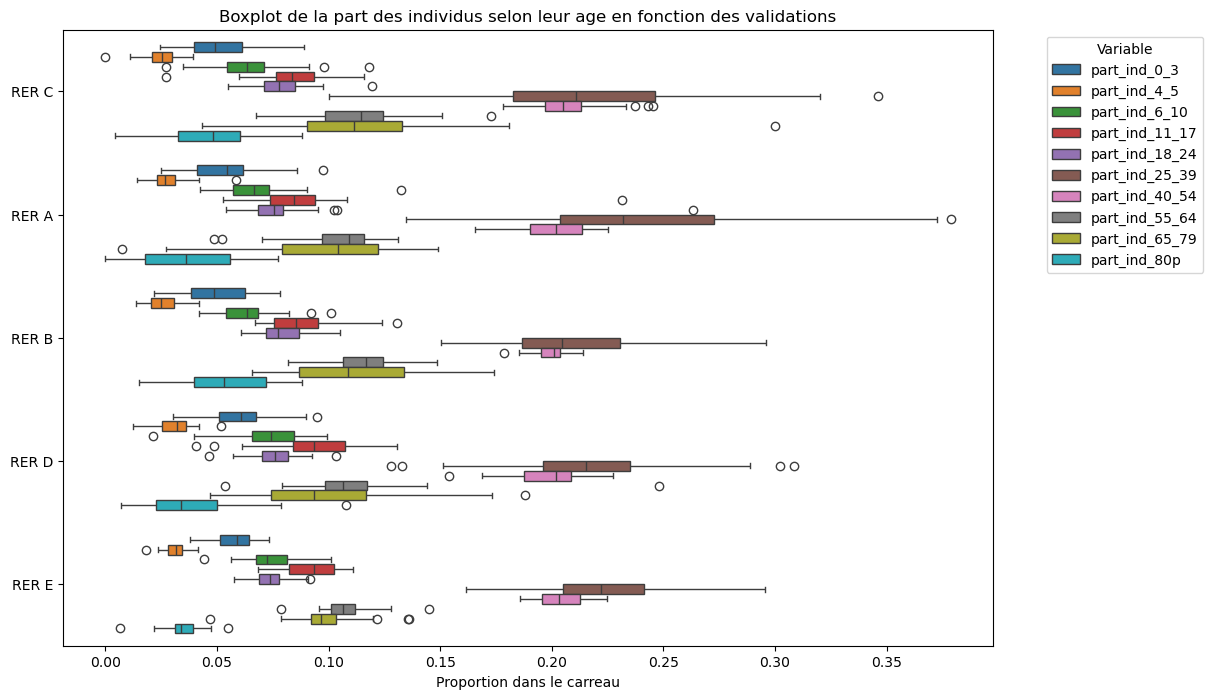

In [117]:
rer_lines = ['RER A', 'RER B', 'RER C', 'RER D', 'RER E']
filtered_data = data_stations[data_stations['res_com'].isin(rer_lines)]

data_melted = pd.melt(filtered_data, id_vars=['res_com'], value_vars=data_stations.columns[35:45], var_name='Variable', value_name='Value')
plt.figure(figsize=(12, 8))
sns.boxplot(x='Value', y='res_com', hue='Variable', data=data_melted, orient='h')
plt.title('Boxplot de la part des individus selon leur age en fonction des validations')
plt.xlabel('Proportion dans le carreau')
plt.ylabel('')
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

**A COMMENTER**